# **Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα**


---



    

---



## Στόχος της εργασίας είναι η μελέτη και βελτιστοποίηση ταξινομητών σε σύνολα δεδομένων.


# **Μέρος 1. UCI dataset**

### Στην ομάδα 38 αντιστοιχεί ο κωδικός *U02* του UCI dataset. Το dataset με το οποίο θα δουλέψουμε είναι το Planning Relax Data Set. Το dataset αφορά την ταξινόμηση δύο νοητικών σταδίων από καταγεγραμμένα σήματα ΗΕΓ(Ηλεκτροεγκεφαλογράφημα). To πρώτο στάδιο ονομάζεται **Planning** και αφορά την καταστάση όπου ο εξεταζόμενος βρισκόταν σε φάση χαλάρωσης και του ζητήθηκε να σκεφτεί νοερά την ανύψωση του δεξιού αντίχειρα για 5 δευτερόλεπτα, χωρίς προφανώς να υπάρξει κάμια κίνηση. Το δεύτερο στάδιο ονομάζεται **Relax** και αφορά την κατάσταση όπου ο εξεταζόμενος βρισκόταν σε χαλαρή κατάσταση για 5 λεπτά.



# Εισαγωγή και επισκόπηση

###Τα δεδομένα του dataset συλλέχθηκαν από ένα υγιές δεξιόχειρα άτομο ηλικίας 25 ετών για 5 φορές σε διάφορες ημέρες. Ζητήθηκε από το άτομο να ξαπλώσει άνετα σε μια χαλαρή θέση με κλειστά μάτια και συμβουλεύτηκε να ελαχιστοποιήσει τις κινήσεις των ματιών. Τέλος κατά τη διάρκεια των μετρήσεων δεν εκτελέστηκε καμία πραγματική κίνηση κατά τη διάρκεια της συνεδρίας. Όλα τα σύνολα δεδομένων ελέγχθηκαν οπτικά για οποιαδήποτε artifacts πριν από την τελική επιλογή και προσθήκη στο dataset.

###Το σύνολο δεδομένων έχει 182 δείγματα για αντίστοιχα ΗΕΓ και περιλαμβάνει 12 χαρακτηριστικά (attributes) για κάθε ΗΕΓ.

###Το dataset χρειάστηκε να το επεξεργαστούμε διότι ανάμεσα στα χαρακτηριστικά υπήρχε tab space αντί για κόμμα, με αποτέλεσμα να έχουμε αρχικά 182 γραμμές και 1 κολώνα αντί για 182 γραμμές και 13 κολώνες. Έτσι κάναμε αντικατάσταση των tab space με κόμμα και τέλος διαγράψαμε την τελευταία κολώνα (14η) που προέκυψε όταν το tab space μετά την 13 κολώνα έγινε κόμμα.

###Τα πρώτα 12 χαρακτηριστικά ουσιαστικά αποτελούν μετρήσεις που καταγράφθηκαν από τα ηλεκτρόδια, τα οποία τέθηκαν στην κεφαλή του εξεταζόμενου ατόμου. Η 13 κολώνα αποτελεί την κατάσταση του ατόμου, αν δηλαδή ήταν σε Planning ή Relax κατάσταση. Και οι 13 κολώνες έχουν αριθμητικά δεδομένα, όπου τα πρώτα 12 περιλαμβάνουν τις μετρήσεις που καταγράφηκαν.

###Η 13η κολώνα περιλαμβάνει είτε την τιμή 1 είτε την τιμή 2. Εφόσον το Data Set Description δεν είναι διαθέσιμο υποθέτουμε πως η τιμή 1 ισούται με την κλάση Relax και η τιμή 2 ισούται με την κλάση Planning, διότι η τιμή 1 είναι πιο συχνά εμφανιζόμενη και παρατηρούμε πως η διάρκεια της Relax κατάστασης στη διάρκεια των εξετάσεων ήταν 5 λεπτά ενώ η διάρκεια της κατάστασης Planning ήταν μόλις 5 δευτερόλεπτα. Ουσιαστικά οι ετικέτες των δύο κλάσεων βρίσκονται στην 13η κολώνα.

###Επικεφαλίδες και αρίθμηση γραμμών δεν υπάρχουν ύστερα από επισκόπηση των δεδομένων.

###Παρακάτω εισάγουμε το dataset στο παρών notebook.
###To αρχείο plrx.txt βρίσκεται στη μορφή όπου κάθε δείγμα(γραμμή) περιέχει 13 χαρακτηριστικά(κολώνες). 

In [ ]:
import pandas as pd
import numpy as np

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00230/plrx.txt"
# Γνωρίζουμε ότι το dataset μας περιέχει μόνο αριθμητικά δεδομένα
# Kαλώντας τη μέθοδο .values τα δεδομένα μετατρέπονται αυτόματα σε πίνακα numpy αντί για data_frame
df = pd.read_csv(url, header=None, sep="\t").values
# Διαγραφή τελευταίας στήλης που περιέχει τιμή ΝaN
df = df[: , :-1]
df[:, -1] = df[:, -1].astype(int)
print(df)
print(df.shape)

[[-0.17936   -0.207     -0.20971   ...  0.0033827 -0.33425    1.       ]
 [-0.14659   -0.16494    0.24987   ... -0.017511   0.066959   1.       ]
 [-0.13131    0.51816    0.43281   ...  0.088057   0.6312     2.       ]
 ...
 [ 0.29877   -0.17962    0.032859  ...  0.24683   -0.38916    2.       ]
 [-0.37812   -0.52287    0.21541   ...  0.007591   0.47603    1.       ]
 [ 0.37913   -0.046562  -0.12336   ...  0.17369    0.49063    2.       ]]
(182, 13)


### Στη σελίδα της μελέτης [Planning Relax Data Set](http://archive.ics.uci.edu/ml/datasets/Planning+Relax) δεν υπήρχε εξαρχής διαθέσιμη η πληροφορία αν υπάρχουν απουσιάζουσες τιμές. Παρατηρώντας όμως το dataset δεν διακρίνουμε να απουσιάζει κάποια τιμή. Αυτό το ελέγχουμε βέβαια και στο παρακάτω κελί.

### Το πλήθος των κλάσεων όπως αναφέραμε είναι 2 στο σύνολο και το dataset μας είναι μη ισορροπημένο καθώς η κλάση Relax είναι 2.5 φορές συχνότερη από την κλάση Planning.

In [ ]:
if not np.isnan(df).any():
  print("Our dataset does not contain any NaN values")
else:
  print("Our dataset contains NaN values")

dataset = np.bincount(df[:, -1].astype(int))[1:]
print(dataset)

balaced_dataset = dataset[0]/dataset[1] if dataset[0] > dataset[1] else dataset[1]/dataset[0]
if balaced_dataset >= 1.5:
  print(f'Our dataset is unbalanced since Relax Class (equals to 1 in column 13) appears {dataset[0]} times and Planning Class (equals to 2 in column 13) appears {dataset[1]} times')
  if dataset[0] > dataset[1]:
    print(f'Relax Class is {balaced_dataset} times larger than Planning Class')
  else:
    print(f'Planning Class is {balaced_dataset} times larger than Relax Class')
else:
  print(f'Our dataset is balanced since Relax Class (equals to 1 in column 13) appears {dataset[0]} times and Planning Class (equals to 2 in column 13) appears {dataset[1]} times')
  if dataset[0] > dataset[1]:
    print(f'Relax Class is {balaced_dataset} times larger than Planning Class')
  else:
    print(f'Planning Class is {balaced_dataset} times larger than Relax Class')

Our dataset does not contain any NaN values
[130  52]
Our dataset is unbalanced since Relax Class (equals to 1 in column 13) appears 130 times and Planning Class (equals to 2 in column 13) appears 52 times
Relax Class is 2.5 times larger than Planning Class


# Προετοιμασία

### Στη σελίδα της μελέτης [Planning Relax Data Set](http://archive.ics.uci.edu/ml/datasets/Planning+Relax) δεν υπήρχε εξαρχής διαθέσιμη η πληροφορία αν το σύνολο δεδομένων μας είναι χωρισμένο σε σύνολο εκπαίδευσης (train set) και σύνολο (test set). 

### Αναζητήσαμε σχετική βιβλιογραφία https://ieeexplore.ieee.org/document/7100718 σχετικά με τη παρούσα μελέτη. Στην 3η παράγραφο αναφέρει χαρακτηριστικά: "The training data has 91 samples and the testing data also  has 91 samples. Total samples are 182." Συνεπώς τα ποσοστά του train και test είναι 50-50. Από την επισκόπηση των δειγμάτων παρατηρούμε πως είναι ενοποιημένα τα train με τα test, δηλαδή μέσα στα 182 δείγματα έχουμε και τα train και τα test.


### Τα σημαντικά κλειδιά του dataset είναι οι ετικέτες του(labels), όπου η τιμή 1 ισούται με την κλάση Relax και η τιμή 2 ισούται με την κλάση Planning, και οι τιμές των χαρακτηριστικών(features). Υπενθυμίζουμε πως οι πρώτες 12 κολώνες έχουν αριθμητικές μετρήσεις των 12 χαρακτηριστικών κάθε δείγματος. Η 13η κολώνα περιέχει την κλάση του κάθε δείγματος πάλι σε αριθμητική τιμή.

### Παρακάτω δημιουργούμε νέες μεταβλητές για τα δύο παραπάνω κλειδιά.


In [ ]:
# τα χαρακτηριστικά του κάθε δείγματος
features_df = df[: , :-1]
print(features_df)
print(features_df.shape)

[[-0.17936   -0.207     -0.20971   ... -0.032886   0.0033827 -0.33425  ]
 [-0.14659   -0.16494    0.24987   ...  0.050759  -0.017511   0.066959 ]
 [-0.13131    0.51816    0.43281   ... -0.040303   0.088057   0.6312   ]
 ...
 [ 0.29877   -0.17962    0.032859  ... -0.41113    0.24683   -0.38916  ]
 [-0.37812   -0.52287    0.21541   ... -0.039117   0.007591   0.47603  ]
 [ 0.37913   -0.046562  -0.12336   ... -0.24229    0.17369    0.49063  ]]
(182, 12)


In [ ]:
# η κλάση του κάθε δείγματος
labels = df[: , -1]
# Μετατροπή labels from float to int, ουσιαστικά αφαιρούμε την . μετά από τον αριθμό 1, 2
labels_df = labels.astype(int)
print(labels_df)
print(labels_df.shape)

[1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1
 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1
 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2
 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
(182,)


# Προεπεξεργασία Dataset

### Παρακάτω θα διαχωρίσουμε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο (test set) με 30% των δειγμάτων στο test set. Παρατηρούμε πως τα δεδομένα εκπαίδευσης δεν έχουν ισορροπημένα πλήθη ανά κατηγορία με την κλάση Planning να είναι περίπου 2.5 φορές μεγαλύτερη από την κλάση Relax όπως είδαμε προηγουμένως. Ένα στοιχείο που μας δείχνει πως οι ταξινομητές μας θα δυσκολευτούν αποτελεί το γεγονός πως έχουμε ένα μικρό dataset και δεν υπάρχει ισορροπία ούτε στο training ούτε στο test.

In [ ]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features_df, labels_df, test_size=0.30)
# imbalanced training set
print(np.bincount(train_labels)[1:])
# imbalanced test set
print(np.bincount(test_labels)[1:])
print(" Train labels shape is " + str(train_labels.shape))
print(" Test labels shape is " + str(test_labels.shape))

[86 41]
[44 11]
 Train labels shape is (127,)
 Test labels shape is (55,)


## Ταξινόμηση με  DummyClassifier

### Aποθηκεύουμε τις μετρήσεις του DummyClassifier στα αντίστοιχα dictionary. Στο F1 score επίλεγουμε στην παράμετρο average την επιλογή weighted.



In [ ]:
Προεπεξεργασία: θα μπορούσαμε να δοκιμάσουμε και άλλες τεχνικές προεπεξεργασίας. Βέβαια, πρόκειται για ένα πολύ μικρό dataset και δεν πρέπει να περιμένουμε δραματικές αλλαγές. from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import time

accuracy_results = {}
f1_results = {}
accuracy_results_compare = {}
f1_results_compare = {}

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

dc_uniform.fit(train, train_labels)
preds_dc_uniform = dc_uniform.predict(test)
accuracy_results['Dummy Uniform'] = accuracy_score(test_labels, preds_dc_uniform)
f1_results['Dummy Uniform'] = f1_score(test_labels, preds_dc_uniform, average='weighted')


dc_constant_1.fit(train, train_labels)
preds_dc_constant_1 = dc_constant_1.predict(test)
accuracy_results['Dummy Constant(1)'] = accuracy_score(test_labels, preds_dc_constant_1)
f1_results['Dummy Constant(1)'] = f1_score(test_labels, preds_dc_constant_1, average='weighted')

dc_constant_2.fit(train, train_labels)
preds_dc_constant_2 = dc_constant_2.predict(test)
accuracy_results['Dummy Constant(2)'] = accuracy_score(test_labels, preds_dc_constant_2)
f1_results['Dummy Constant(2)'] = f1_score(test_labels, preds_dc_constant_2, average='weighted')
cnf_matrix = confusion_matrix(test_labels, preds_dc_constant_2)

dc_most_frequent.fit(train, train_labels)
preds_dc_most_frequent = dc_most_frequent.predict(test)
accuracy_results['Dummy Most Frequent'] = accuracy_score(test_labels, preds_dc_most_frequent)
f1_results['Dummy Most Frequent'] = f1_score(test_labels, preds_dc_most_frequent, average='weighted')

dc_stratified.fit(train, train_labels)
preds_dc_stratified = dc_stratified.predict(test)
accuracy_results['Dummy Stratified'] = accuracy_score(test_labels, preds_dc_stratified)
f1_results['Dummy Stratified'] = f1_score(test_labels, preds_dc_stratified, average='weighted')

## Ταξινόμηση με  Gaussian Naive Bayes (GNB)

## Αποθηκεύουμε τις μετρήσεις του GNB στα αντίστοιχα dictionary. Δίνουμε default παραμέτρους στον ταξινομητή.


In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB_results = []

gnb = GaussianNB()
# calculate fit time
start_time_fit = time.time()
gnb.fit(train, train_labels)
fit_time = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_Naive_Bayes = gnb.predict(test)
predict_time = time.time() - start_time_predict

accuracy_results['Gaussian NB'] = accuracy_score(test_labels, preds_Naive_Bayes)
f1_results['Gaussian NB'] = f1_score(test_labels, preds_Naive_Bayes, average='weighted')

# save for optimization reports later
accuracy_results_compare['Gaussian NB(out-of-the-box)'] = ["default dataset", "default parameters", fit_time, predict_time, accuracy_score(test_labels, preds_Naive_Bayes)]
f1_results_compare['Gaussian NB(out-of-the-box)'] = ["default dataset", "default parameters", fit_time, predict_time, f1_score(test_labels, preds_Naive_Bayes, average='weighted')]

## Ταξινόμηση με  KNeirestNeighbors (kNN)

## Aποθηκεύουμε τις μετρήσεις του kNN στα αντίστοιχα dictionary. Δίνουμε default παραμέτρους στον ταξινομητή.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kNN_results = []

knn = KNeighborsClassifier()
# calculate fit time
start_time_fit = time.time()
knn.fit(train, train_labels)
fit_time = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_kNN = knn.predict(test)
predict_time = time.time() - start_time_predict

accuracy_results['Knn Neighbors'] = accuracy_score(test_labels, preds_kNN)
f1_results['Knn Neighbors'] = f1_score(test_labels, preds_kNN, average='weighted')

# save for optimization reports  later
accuracy_results_compare['Knn Neighbors(out-of-the-box)'] = ["default dataset", "default parameters", fit_time, predict_time, accuracy_score(test_labels, preds_kNN)]
f1_results_compare['Knn Neighbors(out-of-the-box)'] = ["default dataset", "default parameters", fit_time, predict_time, f1_score(test_labels, preds_kNN, average='weighted')]

## Ταξινόμηση με  Logistic Regression (LR)

## Aποθηκεύουμε τις μετρήσεις του LR στα αντίστοιχα dictionary. Δίνουμε default παραμέτρους στον ταξινομητή.

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

# calculate fit time
start_time_fit = time.time()
logisticRegr.fit(train, train_labels)
fit_time = time.time() - start_time_fit
# calculate predict time
start_time_predict = time.time()
preds_logisticRegr = logisticRegr.predict(test)
predict_time = time.time() - start_time_predict

accuracy_results['Logistic Regression'] = accuracy_score(test_labels, preds_logisticRegr)
f1_results['Logistic Regression'] = f1_score(test_labels, preds_logisticRegr, average='weighted')

# save for optimization reports  later
accuracy_results_compare['Logistic Regression(out-of-the-box)'] = ["default dataset", "default parameters", fit_time, predict_time, accuracy_score(test_labels, preds_logisticRegr)]
f1_results_compare['Logistic Regression(out-of-the-box)'] = ["default dataset", "default parameters", fit_time, predict_time, f1_score(test_labels, preds_logisticRegr, average='weighted')]

## Tαξινομούμε τα dictionaries και τα μετατρέπουμε σε λίστα. Ύστερα δημιουργούμε DataFrame ώστε να έχουμε καλύτερη απεικόνιση των αποτελεσμάτων και αποφεύγουμε τη δημιουργία πίνακα σε markdown, ώστε σε κάθε εκτέλεση του notebook να έχουμε αυτόματα τους ζητούμενους πίνακες.

In [ ]:
dataFrame_accuracy_results = []
dataFrame_f1_scores = []

# Create a list of lists for accuracy
sorted_accuracy_results = [(k, accuracy_results[k]) for k in sorted(accuracy_results, key=accuracy_results.get, reverse=True)]
for i in range(len(sorted_accuracy_results)):
  dataFrame_accuracy_results.append(list(sorted_accuracy_results[i]))
  dataFrame_accuracy_results[i].insert(0, i + 1)

# Create a list of lists for f1 score
sorted_f1_results = [(k, f1_results[k]) for k in sorted(f1_results, key=f1_results.get, reverse=True)]
for i in range(len(sorted_f1_results)):
  dataFrame_f1_scores.append(list(sorted_f1_results[i]))
  dataFrame_f1_scores[i].insert(0, i + 1)

# Create dataFrames to show results
df_accuracy_results = pd.DataFrame(dataFrame_accuracy_results, columns =['Index','Classifier', 'Accuracy'])
df_f1_scores = pd.DataFrame(dataFrame_f1_scores, columns =['Index','Classifier', 'F1 Score'])

## Παρακάτω απεικονίζουμε τις αποδόσεις των ταξινομητών ως προς Accuracy.        
## Υπενθυμίζουμε, δεν έχει συμβεί καμία βελτιστοποίηση ως στιγμής.

In [ ]:
df_accuracy_results.style.hide_index()      

Index,Classifier,Accuracy
1,Dummy Constant(1),0.800000
2,Dummy Most Frequent,0.800000
3,Logistic Regression,0.800000
4,Gaussian NB,0.745455
5,Knn Neighbors,0.727273
6,Dummy Uniform,0.490909
7,Dummy Stratified,0.472727
8,Dummy Constant(2),0.200000


## Παρακάτω απεικονίζουμε τις αποδόσεις των ταξινομητών ως προς F1-score.

In [ ]:
df_f1_scores.style.hide_index()

Index,Classifier,F1 Score
1,Dummy Constant(1),0.711111
2,Dummy Most Frequent,0.711111
3,Logistic Regression,0.711111
4,Knn Neighbors,0.694497
5,Gaussian NB,0.683333
6,Dummy Uniform,0.540000
7,Dummy Stratified,0.522944
8,Dummy Constant(2),0.066667


## Παρακάτω απεικονίζουμε τις αποδόσεις των ταξινομητών ως προς το accuracy σε bar plot σύγκρισης.


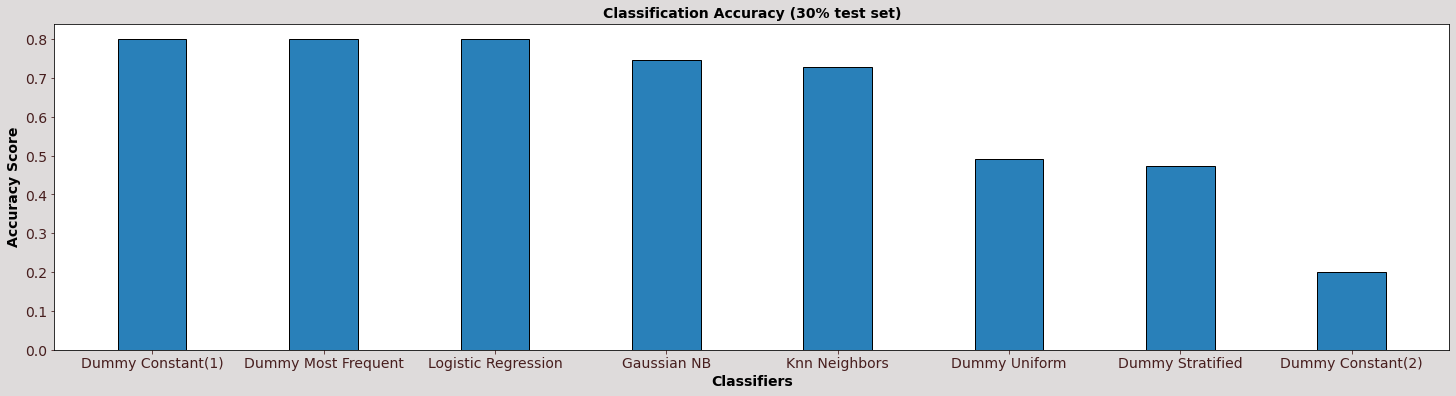

In [ ]:
import matplotlib.pyplot as plt

sorted_accuracy_results_dict = dict(sorted(accuracy_results.items(), key=lambda item: item[1],reverse=True))
classifiers_accuracy = list(sorted_accuracy_results_dict.keys())
values_accuracy = list(sorted_accuracy_results_dict.values())
  
fig = plt.figure(figsize = (25, 6), facecolor='#dedbdb')
 
# creating the bar plot
plt.bar(classifiers_accuracy, values_accuracy, color=	"#2980b9", edgecolor ='black',
        width = 0.4)
 
plt.xlabel("Classifiers", fontweight='bold', fontsize="14", )
plt.ylabel("Accuracy Score", fontweight='bold', fontsize="14")
plt.title("Classification Accuracy (30% test set)", fontweight='bold',fontsize="14")
plt.tick_params(colors='#471e1e', axis='both', labelsize=14)
# plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'axes.facecolor':'#dedbdb'})
plt.show()

## Παρακάτω απεικονίζουμε τις αποδόσεις των ταξινομητών ως προς το f1-score σε bar plot σύγκρισης.


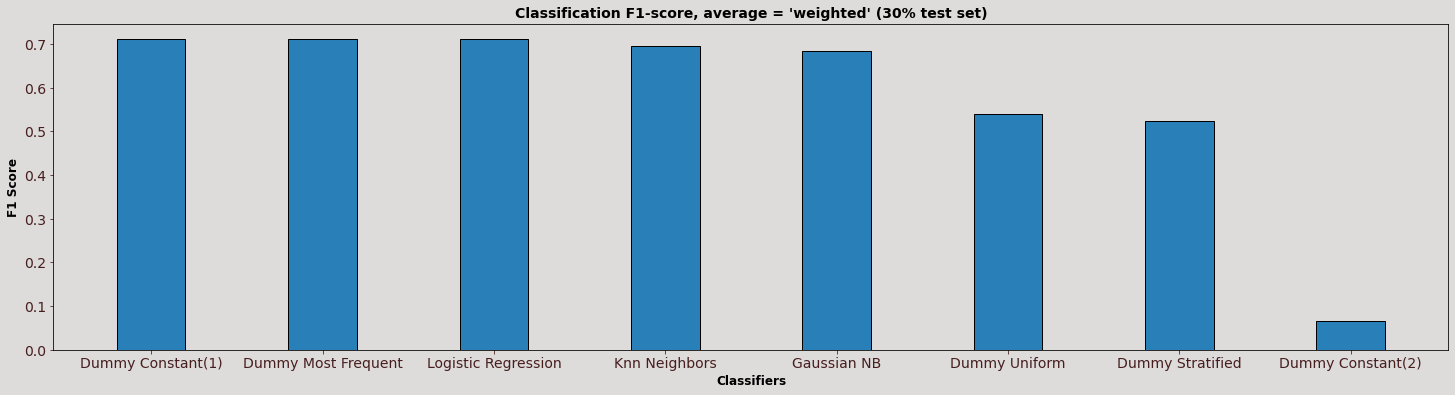

In [ ]:
import matplotlib.pyplot as plt

sorted_f1_results_dict = dict(sorted(f1_results.items(), key=lambda item: item[1],reverse=True))
classifiers_f1 = list(sorted_f1_results_dict.keys())
values_f1 = list(sorted_f1_results_dict.values())
  
fig = plt.figure(figsize = (25, 6), facecolor='#dedbdb')
 
# creating the bar plot
plt.bar(classifiers_f1, values_f1, color=	"#2980b9", edgecolor ='black',
        width = 0.4)
 
plt.xlabel("Classifiers", fontweight='bold', fontsize="12")
plt.ylabel("F1 Score", fontweight='bold', fontsize="12")
plt.title("Classification F1-score, average = 'weighted' (30% test set)", fontweight='bold',fontsize="14")
plt.tick_params(colors='#471e1e', axis='both', labelsize=14)
# plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'axes.facecolor':'#dedbdb'})
plt.show()

#Σχολιασμός Μη Βελτιστοποιημένης Επίδοσης

## Αυτό το οποίο παρατηρούμε σε γενικές γραμμές είναι πως οι ταξινομητές(εκτός του Dummy) δυσκολεύονται αρκετά στο συγκεκριμένο dataset. Ένας λόγος είναι σίγουρο το μικρό μέγεθος του dataset καθώς και το γεγονός πως δεν έχουμε κάνει κάποια βελτιστοποίηση ως στιγμής. Αξιοσημείωτο αποτελεί το γεγονός πως ο Dummy βρίσκεται μαζί με τους υπόλοιπους ταξινομητές και αυτό οφείλεται στο γεγονός πως στο αρχικό dataset υπάρχουν πιο πολλές εμφανίσεις της κλάσης 1(Relax), άρα και στο test. Ως αποτέλεσμα ο Dummy Constant(1) και ο Dummy Most Frequent έχουν απόδοση κοντά με τους KNeighborsClassifier, Gaussian NB και LogisticRegression. Για τον ίδιο λόγο επίσης ο Dummy Constant(2) είναι ο χειρότερος ταξινομητής.

# Πλέον ξεκινάμε τη βελτιστοποίηση των ταξινομητών.

## Να τονίσουμε πως πλέον δε θα ασχοληθούμε με τον DummyClassifier διότι δεν μπορεί να εκπαιδευτεί άρα και να βελτιστοποιηθεί.

In [ ]:
!pip install -U imbalanced-learn

# Βελτιστοποίηση του KNeighborsClassifier 


## Παρακάτω θα δοκιμάσουμε διάφορες επιλογές στο pipeline μας. Συνολικά έχουμε θα πραγματοποιήσουμε τις παρακάτω επιλογές προεπεξεργασίας δεδομένων και υπερπαραμέτρων των ταξινομητών τις οποίες αναγράφουμε στον παρακάτω πίνακα.

| α/α | Επιλογές Προεπεργασίας Δεδομένων|Επιλογή  Προς Δοκιμασία|Υπερπαράμετρος kNN| Υπερπαράμετρος GaussianNB|Υπερπαράμετρος Logistic Regression|
| :----: | :----:                         |:----:|:----:| :----: |:----: |
| 1      |   selector, scaler, ros, pca   |√   |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 2      |   selector, scaler, ros        |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 3      |   selector, scaler, smote      |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 4      |   selector, ros, pca           |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 5      |   selector, smote, pca         |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 6      |   selector, scaler, pca        |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 7      |   scaler, ros, pca             |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 8      |   scaler, smote, pca           |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 9      | scaler, ros                    |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 10     | scaler, smote                  |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 11     | scaler, pca                    |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 12     | smote, pca                     |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 13     | ros, pca                       |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 14     | selector, pca                  |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 15     | selector, scaler               |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 16     | selector, ros                  |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 17     | selector, smote                |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 18     | ros                            |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 19     | smote                          |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 20     | selector                       |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 21     | pca                            |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter
| 22     | no dataset preprocessing       |√    |n_neighbors, p|var_smoothing|penalty, solver, C, max_iter

### Στα παραπάνω έχουμε της εξής αντιστοίχιση selector-> VarianceThreshold, scaler -> StandardScaler, ros ->  RandomOverSampler, smote -> SMOTE(), pca -> PCA.

### Επίσης, δοκιμάσαμε ως προς το ovesampling με SMOTE να βελτιστοποιήσουμε την παράμετο sampling_strategy. Το ovesampling με RandomOverSampler έγινε με dafault παραμέτρους.

### Ως προς το VarianceThreshold δοκιμάσαμε να βελτιστοποιήσουμε την παράμετρο vthreshold.

### Ως προς το PCA δοκιμάσαμε να βελτιστοποιήσουμε την παράμετρο n_components.

### Τέλος κάνουμε import όσα θα μας χρειαστούν για τους υπολογισμούς μας.

In [ ]:
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 

# import confusion matrix
from sklearn.metrics import confusion_matrix

# data preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# warnings suppressed
from warnings import simplefilter
from sklearn.exceptions import FitFailedWarning

#import time for time measuring
import time

# αρχικοποιούμε την προεπεξεργασία των δεδομένων για να ορίσουμε το pipeline μας μετά
selector = VarianceThreshold() # μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών
scaler = StandardScaler() # κανονικοποίηση χαρακτηριστικών
ros = RandomOverSampler() # εξισσοροπούμε το dataset με oversampling
smote = SMOTE() # εξισσοροπούμε το dataset με SMOTE
pca = PCA() # ανάλυση σε κύριες συνιστώσες

train_variance = train.var(axis=0)
print(sorted(train_variance))
print(np.max(train_variance))

[0.10779130609457534, 0.10862683534732598, 0.1259059921364558, 0.14425343624962833, 0.15489463357314492, 0.15715108065396968, 0.16762414942091125, 0.19314739943603257, 0.1951355558984184, 0.20552440343761308, 0.20710102328070296, 0.2462750268297247]
0.2462750268297247


## Βελτιστοποίηση KNeighborsClassifier ως προς F1-Score (average = weighted)

In [ ]:
kNN_optimal = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = -1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

vthreshold = [0, 0.1, 0.15, 0.20, sorted(train_variance)[len(sorted(train_variance)) - 2]] # προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [1, 3, 6, 9, 11] # PCA - τελικός αριθμός features
k = [1, 2, 3, 4, 5, 11] # η υπερπαράμετρος του ταξινομητή kNN
p = [2, 1] # Power parameter for the Minkowski metric
strategy = ['auto', 0.6, 0.7, 0.8]

# προεπεξεργασια dataset : selector, scaler, ros, pca - Υπερπαράμετρος = n_neighbors
pipeline0 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters0 = dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : selector, scaler, ros - Υπερπαράμετρος = n_neighbors
pipeline1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('kNN', kNN_optimal)], memory = 'tmp')
parameters1 = dict(selector__threshold=vthreshold, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : selector, scaler, smote - Υπερπαράμετρος = n_neighbors
pipeline2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', smote), ('kNN', kNN_optimal)], memory = 'tmp')
parameters2 = dict(selector__threshold=vthreshold, sampler__sampling_strategy=strategy, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : selector, ros, pca - Υπερπαράμετρος = n_neighbors
pipeline3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters3 = dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : selector, smote, pca - Υπερπαράμετρος = n_neighbors
pipeline4 = Pipeline(steps=[('selector', selector), ('sampler', smote), ('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters4 = dict(selector__threshold=vthreshold, sampler__sampling_strategy=strategy, pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : selector, scaler, pca - Υπερπαράμετρος = n_neighbors
pipeline5 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters5 = dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : scaler, ros, pca - Υπερπαράμετρος = n_neighbors
pipeline6 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters6 = dict(pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : scaler, smote, pca - Υπερπαράμετρος = n_neighbors
pipeline7 = Pipeline(steps=[('scaler', scaler), ('sampler', smote), ('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters7 = dict(sampler__sampling_strategy=strategy, pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : scaler, ros - Υπερπαράμετρος = n_neighbors
pipeline8 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('kNN', kNN_optimal)], memory = 'tmp')
parameters8 = dict(kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : scaler, smote - Υπερπαράμετρος = n_neighbors
pipeline9 = Pipeline(steps=[('scaler', scaler), ('sampler', smote), ('kNN', kNN_optimal)], memory = 'tmp')
parameters9 = dict(sampler__sampling_strategy=strategy, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : scaler, pca - Υπερπαράμετρος = n_neighbors
pipeline10 = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters10 = dict(pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : smote, pca - Υπερπαράμετρος = n_neighbors
pipeline11 = Pipeline(steps=[('sampler', smote), ('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters11 = dict(sampler__sampling_strategy=strategy, pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : ros, pca - Υπερπαράμετρος = n_neighbors
pipeline12 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters12 = dict(pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : selector, pca - Υπερπαράμετρος = n_neighbors
pipeline13 = Pipeline(steps=[('selector', selector), ('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters13 = dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : selector, scaler - Υπερπαράμετρος = n_neighbors
pipeline14 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('kNN', kNN_optimal)], memory = 'tmp')
parameters14 = dict(selector__threshold=vthreshold, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : selector, ros - Υπερπαράμετρος = n_neighbors
pipeline15 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('kNN', kNN_optimal)], memory = 'tmp')
parameters15 = dict(selector__threshold=vthreshold, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : selector, smote - Υπερπαράμετρος = n_neighbors
pipeline16 = Pipeline(steps=[('selector', selector), ('sampler', smote), ('kNN', kNN_optimal)], memory = 'tmp')
parameters16 = dict(selector__threshold=vthreshold, sampler__sampling_strategy=strategy, kNN__n_neighbors=k, kNN__p = p)
                    
# προεπεξεργασια dataset : ros - Υπερπαράμετρος = n_neighbors
pipeline17 = Pipeline(steps=[('sampler', ros), ('kNN', kNN_optimal)], memory = 'tmp')
parameters17 = dict(kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : smote - Υπερπαράμετρος = n_neighbors
pipeline18 = Pipeline(steps=[('sampler', smote), ('kNN', kNN_optimal)], memory = 'tmp')
parameters18 = dict(sampler__sampling_strategy=strategy, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : selector - Υπερπαράμετρος = n_neighbors
pipeline19 = Pipeline(steps=[('selector', selector), ('kNN', kNN_optimal)], memory = 'tmp')
parameters19 = dict(selector__threshold=vthreshold, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : pca - Υπερπαράμετρος = n_neighbors
pipeline20 = Pipeline(steps=[('pca', pca), ('kNN', kNN_optimal)], memory = 'tmp')
parameters20 = dict(pca__n_components=n_components, kNN__n_neighbors=k, kNN__p = p)

# προεπεξεργασια dataset : καμία - Υπερπαράμετρος = n_neighbors
pipeline21 =  Pipeline(steps=[('kNN', kNN_optimal)], memory = 'tmp')
parameters21 = dict(kNN__n_neighbors=k, kNN__p = p)

pips = [pipeline0, pipeline1, pipeline2, pipeline3, pipeline4, pipeline5, pipeline6, 
        pipeline7, pipeline8, pipeline9, pipeline10, pipeline11, pipeline12, pipeline13,
        pipeline14, pipeline15, pipeline16, pipeline17, pipeline18, pipeline19, pipeline20,
        pipeline21]

pars = [parameters0, parameters1, parameters2, parameters3, parameters4, parameters5, 
        parameters6, parameters7, parameters8, parameters9, parameters10, parameters11,
        parameters12, parameters13, parameters14, parameters15, parameters16, parameters17,
        parameters18, parameters19, parameters20, parameters21]

### Παραπάνω ορίσαμε τους συνδυασμούς που θα εκτελέσουμε προς βελτιστοποίηση. Παρακάτω κάνουμε fit και predict τον ταξινομητή μας. Ωστόσο αγνοούμε τα FitFailedWarning. Ουσιαστικά επειδή έχουμε μόλις 12 χαρακτηριστικά όταν εισάγουμε στο pipeline την επιλογή για VarianceThreshold, τότε αφαιρούνται χαρακτηριστικά αλλά παραμένει η επιλογή για τον αριθμό των κύριων συνιστωσών(PCA). Οπότε έχουμε μια κατάσταση όπου έχουμε έστω x δείγματα που απέμειναν μέσω VarianceThreshold και y δείγματα ως επιλογή στο PCA με y > x. Αυτό δεν επηρεάζει τις μετρήσεις μας διότι το GridSearch συνεχίζεται και όπου ισχύει y > x μας βγάζει warning τα οποία τα αγνοούμε ώστε να μην τα έχουμε στο output. Στο τέλος sortaroume το dictionary από υψηλότερο F1-Score προς χαμηλότερο F1-Score.

In [ ]:
kNN_optimized_for_f1_score = {}

simplefilter("ignore", category=FitFailedWarning)
simplefilter("ignore", category=UserWarning)

for i in range(len(pars)):
  estimator_f1 = GridSearchCV(pips[i], pars[i], cv=10, scoring='f1_weighted', n_jobs=-1)
  # calculate fit time
  start_time_fit = time.time()
  estimator_f1.fit(train, train_labels)
  fit_time = time.time() - start_time_fit
  # calculate predict time
  start_time_predict = time.time()
  preds = estimator_f1.predict(test)
  predict_time = time.time() - start_time_predict
  cnf_matrix = confusion_matrix(test_labels, preds)
  kNN_optimized_for_f1_score[estimator_f1.best_estimator_] = [estimator_f1.best_params_, 
                                fit_time, predict_time, f1_score(test_labels, preds, average='weighted'), cnf_matrix]

kNN_optimized_for_f1_score = dict(sorted(kNN_optimized_for_f1_score. items(), key=lambda x: x[1][3], reverse=True))
#for k,v in kNN_optimized_for_f1_score.items():
#  print(k, v)


## Η καλύτερη βελτιστοποίηση από τις επιλογές μας ως προς F1-Score του kNN τυπώνεται παρακάτω.

In [ ]:
# save best options for f1 for our optimized classifiers 

best_optimized_options_for_f1 = {}

for k,v in kNN_optimized_for_f1_score.items():
  estimator_parameters = []
  for i in range(len(k) - 1):
    estimator_parameters.append(k[i])
  if len(k):
    print("The Best estimator for kNN contains : " + str(estimator_parameters))
  else:
    print("The Best estimator for kNN contains no dataset preprocessing")
  inner_i = 0;
  for innerK, innerV in v[0].items():
    if inner_i == 0:
      number_of_neighbors = innerV
    if inner_i == 1:
      p_parameter = innerV
    inner_i += 1
  print("Number of neighbors for kNN are : " + str(number_of_neighbors))
  print("P parameter of kNN is : " + str(p_parameter))
  print("Fit time is = " + str(v[1]))
  print("Predict time is = " + str(v[2]))
  print("F1-Score is = " + str(v[3]))
  # save best optimizations for f1 metric
  best_optimized_options_for_f1[k] = v
  f1_results_compare['Knn Neighbors(optimized)'] = [str(estimator_parameters), f'Neigbors = {number_of_neighbors}, P = {p_parameter}', v[1], v[2], v[3]]
  break
#print(best_optimized_options_for_f1)

The Best estimator for kNN contains : [RandomOverSampler(), PCA(n_components=3)]
Number of neighbors for kNN are : 2
P parameter of kNN is : 1
Fit time is = 35.15430307388306
Predict time is = 0.10376167297363281
F1-Score is = 0.729616724738676


## Παρακάτω θα βελτιστοποιήσουμε τoν kNN ως προς accuracy.
## Ουσιαστικά αλλάζουμε στο gridSearch την παράμετρο scoring σε accuracy.


In [ ]:
kNN_optimized_for_accuracy = {}

simplefilter("ignore", category=FitFailedWarning)
simplefilter("ignore", category=UserWarning)


for i in range(len(pars)):
  estimator_accuracy = GridSearchCV(pips[i], pars[i], cv=10, scoring='accuracy', n_jobs=-1)
  # calculate fit time
  start_time_fit = time.time()
  estimator_accuracy.fit(train, train_labels)
  fit_time = time.time() - start_time_fit
  # calculate predict time
  start_time_predict = time.time()
  preds = estimator_accuracy.predict(test)
  predict_time = time.time() - start_time_predict
  cnf_matrix = confusion_matrix(test_labels, preds)
  kNN_optimized_for_accuracy[estimator_accuracy.best_estimator_] = [estimator_accuracy.best_params_, 
                               fit_time, predict_time, accuracy_score(test_labels, preds), cnf_matrix]

kNN_optimized_for_accuracy = dict(sorted(kNN_optimized_for_accuracy. items(), key=lambda x: x[1][3], reverse=True))
#for k,v in kNN_optimized_for_accuracy.items():
#  print(k, v)

## Η καλύτερη βελτιστοποίηση από τις επιλογές μας ως προς accuracy του kNN τυπώνεται παρακάτω.

In [ ]:
# save best options for accuracy for our optimized classifiers 

best_optimized_options_for_accuracy = {}

for k,v in kNN_optimized_for_accuracy.items():
  estimator_parameters = []
  for i in range(len(k) - 1):
    estimator_parameters.append(k[i])
  if len(k):
    print("The Best estimator for kNN contains : " + str(estimator_parameters))
  else:
    print("The Best estimator for kNN contains no dataset preprocessing")
  inner_i = 0;
  for innerK, innerV in v[0].items():
    if inner_i == 0:
      number_of_neighbors = innerV
    if inner_i == 1:
      p_parameter = innerV
    inner_i += 1
  print("Number of neighbors for kNN are : " + str(number_of_neighbors))
  print("P parameter of kNN is : " + str(p_parameter))
  print("Fit time is = " + str(v[1]))
  print("Predict time is = " + str(v[2]))
  print("Accuracy is = " + str(v[3]))
  # save best options
  best_optimized_options_for_accuracy[k] = v
  accuracy_results_compare['Knn Neighbors(optimized)'] = [str(estimator_parameters), f'Neigbors = {number_of_neighbors}, P = {p_parameter}', v[1], v[2], v[3]]
  break
#print(best_optimized_options_for_accuracy)

The Best estimator for kNN contains : [PCA(n_components=1)]
Number of neighbors for kNN are : 11
P parameter of kNN is : 2
Fit time is = 33.72326350212097
Predict time is = 0.10402774810791016
Accuracy is = 0.8


# Βελτιστοποίηση του Gaussian Naive Bayes (GNB) 


In [ ]:
gnb_optimal = GaussianNB()

vthreshold = [0, 0.1, 0.15, 0.20, 0.22, sorted(train_variance)[len(sorted(train_variance)) - 2]] # προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [1, 3, 6, 9, 11] # PCA - τελικός αριθμός features
var_smoothing = [1e-8, 1e-9, 1e-10, 1e-11, 1e-12] # η υπερπαράμετρος του ταξινομητή GaussianNB
strategy = ['auto', 0.6, 0.7, 0.8]

# προεπεξεργασια dataset : selector, scaler, ros, pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_0 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_0 = dict(selector__threshold=vthreshold, pca__n_components=n_components, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : selector, scaler, ros - Υπερπαράμετρος = var_smoothing
pipeline_gnb_1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_1 = dict(selector__threshold=vthreshold, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : selector, scaler, smote - Υπερπαράμετρος = var_smoothing
pipeline_gnb_2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', smote), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_2 = dict(selector__threshold=vthreshold, sampler__sampling_strategy=strategy, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : selector, ros, pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_3 = dict(selector__threshold=vthreshold, pca__n_components=n_components, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : selector, smote, pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_4 = Pipeline(steps=[('selector', selector), ('sampler', smote), ('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_4 = dict(selector__threshold=vthreshold, pca__n_components=n_components, sampler__sampling_strategy=strategy, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : selector, scaler, pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_5 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_5 = dict(selector__threshold=vthreshold, pca__n_components=n_components, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : scaler, ros, pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_6 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_6 = dict(pca__n_components=n_components, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : scaler, smote, pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_7 = Pipeline(steps=[('scaler', scaler), ('sampler', smote), ('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_7 = dict(pca__n_components=n_components, sampler__sampling_strategy=strategy, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : scaler, ros - Υπερπαράμετρος = var_smoothing
pipeline_gnb_8 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_8 = dict(gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : scaler, smote - Υπερπαράμετρος = var_smoothing
pipeline_gnb_9 = Pipeline(steps=[('scaler', scaler), ('sampler', smote), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_9 = dict(sampler__sampling_strategy=strategy, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : scaler, pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_10 = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_10 = dict(pca__n_components=n_components, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : smote, pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_11 = Pipeline(steps=[('sampler', smote), ('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_11 = dict(sampler__sampling_strategy=strategy, pca__n_components=n_components, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : ros, pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_12 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_12 = dict(pca__n_components=n_components, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : selector, pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_13 = Pipeline(steps=[('selector', selector), ('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_13 = dict(selector__threshold=vthreshold, pca__n_components=n_components, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : selector, scaler - Υπερπαράμετρος = var_smoothing
pipeline_gnb_14 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_14 = dict(selector__threshold=vthreshold, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : selector, ros - Υπερπαράμετρος = var_smoothing
pipeline_gnb_15 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_15 = dict(selector__threshold=vthreshold, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : selector, smote - Υπερπαράμετρος = var_smoothing
pipeline_gnb_16 = Pipeline(steps=[('selector', selector), ('sampler', smote), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_16 = dict(selector__threshold=vthreshold, sampler__sampling_strategy=strategy, gnb__var_smoothing=var_smoothing)
                    
# προεπεξεργασια dataset : ros - Υπερπαράμετρος = var_smoothing
pipeline_gnb_17 = Pipeline(steps=[('sampler', ros), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_17 = dict(gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : smote - Υπερπαράμετρος = var_smoothing
pipeline_gnb_18 = Pipeline(steps=[('sampler', smote), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_18 = dict(sampler__sampling_strategy=strategy, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : selector - Υπερπαράμετρος = var_smoothing
pipeline_gnb_19 = Pipeline(steps=[('selector', selector), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_19 = dict(selector__threshold=vthreshold, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : pca - Υπερπαράμετρος = var_smoothing
pipeline_gnb_20 = Pipeline(steps=[('pca', pca), ('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_20 = dict(pca__n_components=n_components, gnb__var_smoothing=var_smoothing)

# προεπεξεργασια dataset : καμία - Υπερπαράμετρος = var_smoothing
pipeline_gnb_21 =  Pipeline(steps=[('gnb', gnb_optimal)], memory = 'tmp')
parameters_gnb_21 = dict(gnb__var_smoothing=var_smoothing)

pips_gnb = [pipeline_gnb_0, pipeline_gnb_1, pipeline_gnb_2, pipeline_gnb_3, pipeline_gnb_4,
            pipeline_gnb_5, pipeline_gnb_6, pipeline_gnb_7, pipeline_gnb_8, pipeline_gnb_9, 
            pipeline_gnb_10, pipeline_gnb_11, pipeline_gnb_12, pipeline_gnb_13, pipeline_gnb_14, 
            pipeline_gnb_15, pipeline_gnb_16, pipeline_gnb_17, pipeline_gnb_18, pipeline_gnb_19, 
            pipeline_gnb_20, pipeline_gnb_21]

pars_gnb = [parameters_gnb_0, parameters_gnb_1, parameters_gnb_2, parameters_gnb_3, parameters_gnb_4,
            parameters_gnb_5, parameters_gnb_6, parameters_gnb_7, parameters_gnb_8, parameters_gnb_9,
            parameters_gnb_10, parameters_gnb_11, parameters_gnb_12, parameters_gnb_13, parameters_gnb_14,
            parameters_gnb_15, parameters_gnb_16, parameters_gnb_17, parameters_gnb_18, parameters_gnb_19,
            parameters_gnb_20, parameters_gnb_21]

## Βελτιστοποίηση GaussianNB ως προς F1-Score (average = weighted)

In [ ]:
gnb_optimized_for_f1_score = {}

simplefilter("ignore", category=FitFailedWarning)
simplefilter("ignore", category=UserWarning)

for i in range(len(pars_gnb)):
  estimator_gnb_f1 = GridSearchCV(pips_gnb[i], pars_gnb[i], cv=10, scoring='f1_weighted', n_jobs=-1)
  # calculate fit time
  start_time_fit = time.time()
  estimator_gnb_f1.fit(train, train_labels)
  fit_time = time.time() - start_time_fit
  # calculate predict time
  start_time_predict = time.time()
  preds = estimator_gnb_f1.predict(test)
  predict_time = time.time() - start_time_predict
  cnf_matrix = confusion_matrix(test_labels, preds)
  gnb_optimized_for_f1_score[estimator_gnb_f1.best_estimator_] = [estimator_gnb_f1.best_params_, 
                                fit_time, predict_time, f1_score(test_labels, preds, average='weighted'), cnf_matrix]
  
gnb_optimized_for_f1_score = dict(sorted(gnb_optimized_for_f1_score. items(), key=lambda x: x[1][3], reverse=True))
#for k,v in gnb_optimized_for_f1_score.items():
#  print(k, v)

## Η καλύτερη βελτιστοποίηση από τις επιλογές μας ως προς F1-Score του GaussianNB τυπώνεται παρακάτω.

In [ ]:
for k,v in gnb_optimized_for_f1_score.items():
  estimator_parameters = []
  for i in range(len(k) - 1):
    estimator_parameters.append(k[i])
  if len(k):
    print("The Best estimator for GaussianNB  contains : " + str(estimator_parameters))
  else:
    print("The Best estimator for GaussianNB  contains no dataset preprocessing")
  var_smooth = next(iter(v[0].values()))
  print("Value of var_smoothing for GaussianNB is : " + str(var_smooth))
  print("Fit time is = " + str(v[1]))
  print("Predict time is = " + str(v[2]))
  print("F1-Score is = " + str(v[3]))
  # save best options
  best_optimized_options_for_f1[k] = v
  f1_results_compare['Gaussian NB(optimized)'] = [str(estimator_parameters), f'Var_smoothing = {var_smooth}', v[1], v[2], v[3]]
  break

The Best estimator for GaussianNB  contains : [VarianceThreshold(threshold=0.1), SMOTE(sampling_strategy=0.6), PCA(n_components=6)]
Value of var_smoothing for GaussianNB is : 1e-08
Fit time is = 40.73969054222107
Predict time is = 0.0006055831909179688
F1-Score is = 0.7285714285714285


## Παρακάτω θα βελτιστοποιήσουμε τoν GaussianNB ως προς accuracy.
## Ουσιαστικά αλλάζουμε στο gridSearch την παράμετρο scoring σε accuracy.

In [ ]:
gnb_optimized_for_accuracy = {}

simplefilter("ignore", category=FitFailedWarning)
simplefilter("ignore", category=UserWarning)

for i in range(len(pars_gnb)):
  estimator_gnb_accuracy= GridSearchCV(pips_gnb[i], pars_gnb[i], cv=10, scoring='accuracy', n_jobs=-1)
  # calculate fit time
  start_time_fit = time.time()
  estimator_gnb_accuracy.fit(train, train_labels)
  fit_time = time.time() - start_time_fit
  # calculate predict time
  start_time_predict = time.time()
  preds = estimator_gnb_accuracy.predict(test)
  predict_time = time.time() - start_time_predict
  cnf_matrix = confusion_matrix(test_labels, preds)
  gnb_optimized_for_accuracy[estimator_gnb_accuracy.best_estimator_] = [estimator_gnb_accuracy.best_params_, 
                                fit_time, predict_time, accuracy_score(test_labels, preds), cnf_matrix]
  
gnb_optimized_for_accuracy = dict(sorted(gnb_optimized_for_accuracy. items(), key=lambda x: x[1][3], reverse=True))
#for k,v in gnb_optimized_for_accuracy.items():
#  print(k, v)

## Η καλύτερη βελτιστοποίηση από τις επιλογές μας ως προς accuracy του GaussianNB τυπώνεται παρακάτω.

In [ ]:
for k,v in gnb_optimized_for_accuracy.items():
  estimator_parameters = []
  for i in range(len(k) - 1):
    estimator_parameters.append(k[i])
  if len(k):
    print("The Best estimator for GaussianNB contains : " + str(estimator_parameters))
  else:
    print("The Best estimator for GaussianNB contains no dataset preprocessing")
  var_smooth = next(iter(v[0].values()))
  print("Value of var_smoothing for GaussianNB is : " + str(var_smooth))
  print("Fit time is = " + str(v[1]))
  print("Predict time is = " + str(v[2]))
  print("Accuracy is = " + str(v[3]))
  # save best options
  best_optimized_options_for_accuracy[k] = v
  accuracy_results_compare['Gaussian NB(optimized)'] = [str(estimator_parameters), f'Var_smoothing = {var_smooth}', v[1], v[2], v[3]]
  break

The Best estimator for GaussianNB contains : [VarianceThreshold(threshold=0.20710102328070296), StandardScaler(), SMOTE(sampling_strategy=0.6)]
Value of var_smoothing for GaussianNB is : 1e-08
Fit time is = 7.974903345108032
Predict time is = 0.00046181678771972656
Accuracy is = 0.8


# Βελτιστοποίηση Logistic Regression


In [ ]:
LR_optimal = LogisticRegression(n_jobs=-1)

vthreshold = [0, 0.1, 0.15, 0.20, 0.22, sorted(train_variance)[len(sorted(train_variance)) - 2]] # προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [1, 3, 6, 9, 11] # PCA - τελικός αριθμός features
strategy = ['auto', 0.6, 0.7, 0.8]
penalty = ['l1', 'l2'] # η υπερπαράμετρος του ταξινομητή LogisticRegression
solver = ['liblinear', 'lbfgs']
max_iter = [300, 100, 80, 50]
C = [1.0, 0.9, 0.8]

# selector = VarianceThreshold(), scaler = StandardScaler(), ros = RandomOverSampler(), smote = SMOTE(), pca = PCA()

# προεπεξεργασια dataset : selector, scaler, ros, pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_0 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_0 = dict(selector__threshold=vthreshold, pca__n_components=n_components,
                        logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : selector, scaler, ros - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_1 = dict(selector__threshold=vthreshold, 
                       logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : selector, scaler, smote - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', smote), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_2 = dict(selector__threshold=vthreshold, sampler__sampling_strategy=strategy,
                       logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : selector, ros, pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_3 = dict(selector__threshold=vthreshold, pca__n_components=n_components, 
                       logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : selector, smote, pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_4 = Pipeline(steps=[('selector', selector), ('sampler', smote), ('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_4 = dict(selector__threshold=vthreshold, sampler__sampling_strategy=strategy, pca__n_components=n_components, 
                       logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : selector, scaler, pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_5 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_5 = dict(selector__threshold=vthreshold, pca__n_components=n_components, 
                       logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : scaler, ros, pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_6 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_6 = dict(pca__n_components=n_components, 
                       logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : scaler, smote, pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_7 = Pipeline(steps=[('scaler', scaler), ('sampler', smote), ('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_7 = dict(sampler__sampling_strategy=strategy, pca__n_components=n_components, 
                       logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : scaler, ros - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_8 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_8 = dict(logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : scaler, smote - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_9 = Pipeline(steps=[('scaler', scaler), ('sampler', smote), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_9 = dict(sampler__sampling_strategy=strategy, logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : scaler, pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_10 = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_10 = dict(pca__n_components=n_components, 
                        logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : smote, pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_11 = Pipeline(steps=[('sampler', smote), ('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_11 = dict(sampler__sampling_strategy=strategy, pca__n_components=n_components,
                        logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : ros, pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_12 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_12 = dict(pca__n_components=n_components, 
                        logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : selector, pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_13 = Pipeline(steps=[('selector', selector), ('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_13 = dict(selector__threshold=vthreshold, pca__n_components=n_components, 
                        logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : selector, scaler - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_14 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_14 = dict(selector__threshold=vthreshold, 
                        logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : selector, ros - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_15 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_15 = dict(selector__threshold=vthreshold, 
                        logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : selector, smote - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_16 = Pipeline(steps=[('selector', selector), ('sampler', smote), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_16 = dict(sampler__sampling_strategy=strategy, selector__threshold=vthreshold, 
                        logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)
                    
# προεπεξεργασια dataset : ros - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_17 = Pipeline(steps=[('sampler', ros), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_17 = dict(logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : smote - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_18 = Pipeline(steps=[('sampler', smote), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_18 = dict(sampler__sampling_strategy=strategy, logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : selector - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_19 = Pipeline(steps=[('selector', selector), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_19 = dict(selector__threshold=vthreshold,
                        logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : pca - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_20 = Pipeline(steps=[('pca', pca), ('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_20 = dict(pca__n_components=n_components, 
                        logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

# προεπεξεργασια dataset : καμία - Υπερπαράμετρος = penalty, solver, C, max_iter
pipeline_LR_21 =  Pipeline(steps=[('logreg', LR_optimal)], memory = 'tmp')
parameters_LR_21 = dict(logreg__penalty=penalty, logreg__solver=solver, logreg__max_iter=max_iter, logreg__C=C)

pips_LR = [pipeline_LR_0, pipeline_LR_1, pipeline_LR_2, pipeline_LR_3, pipeline_LR_4,
           pipeline_LR_5, pipeline_LR_6, pipeline_LR_7, pipeline_LR_8, pipeline_LR_9,
           pipeline_LR_10, pipeline_LR_11, pipeline_LR_12, pipeline_LR_13, pipeline_LR_14,
           pipeline_LR_15, pipeline_LR_16, pipeline_LR_17, pipeline_LR_18, pipeline_LR_19,
           pipeline_LR_20, pipeline_LR_21]

pars_LR = [parameters_LR_0, parameters_LR_1, parameters_LR_2, parameters_LR_3, parameters_LR_4,
           parameters_LR_5, parameters_LR_6, parameters_LR_7, parameters_LR_8, parameters_LR_9,
           parameters_LR_10, parameters_LR_11, parameters_LR_12, parameters_LR_13, parameters_LR_14,
           parameters_LR_15, parameters_LR_16, parameters_LR_17, parameters_LR_18, parameters_LR_19,
           parameters_LR_20, parameters_LR_21]

## Βελτιστοποίηση Logistic Regression ως προς F1-Score (average = weighted)

In [ ]:
logreg_optimized_for_f1_score = {}

simplefilter("ignore", category=FitFailedWarning)
simplefilter("ignore", category=UserWarning)

for i in range(len(pars_gnb)):
  estimator_logreg_f1 = GridSearchCV(pips_LR[i], pars_LR[i], cv=10, scoring='f1_weighted', n_jobs=-1)
  # calculate fit time
  start_time_fit = time.time()
  estimator_logreg_f1.fit(train, train_labels)
  fit_time = time.time() - start_time_fit
  # calculate predict time
  start_time_predict = time.time()
  preds = estimator_logreg_f1.predict(test)
  predict_time = time.time() - start_time_predict
  cnf_matrix = confusion_matrix(test_labels, preds)
  logreg_optimized_for_f1_score[estimator_logreg_f1.best_estimator_] = [estimator_logreg_f1.best_params_, 
                                fit_time, predict_time, f1_score(test_labels, preds, average='weighted'), cnf_matrix]
                                
logreg_optimized_for_f1_score = dict(sorted(logreg_optimized_for_f1_score. items(), key=lambda x: x[1][3], reverse=True))
#for k,v in logreg_optimized_for_f1_score.items():
#print(k, v)

## Η καλύτερη βελτιστοποίηση από τις επιλογές μας ως προς F1-Score του Logistic Regression τυπώνεται παρακάτω.

In [ ]:
for k,v in logreg_optimized_for_f1_score.items():
  estimator_parameters = []
  for i in range(len(k) - 1):
    estimator_parameters.append(k[i])
  if len(k):
    print("The Best estimator for Logistic Regression contains : " + str(estimator_parameters))
  else:
    print("The Best estimator for Logistic Regression contains no dataset preprocessing")
  inner_index = 0
  log_reg_huper_parameters = []
  print("Huper parameters values for Logistic Regression are : ")
  for innerK, innerV in v[0].items():
    print(str(innerK) + " = " + str(innerV))
    log_reg_huper_parameters.append(str(innerK) + " = " + str(innerV))
    inner_index += 1
    if inner_index == 4:
      break
  print("Fit time is = " + str(v[1]))
  print("Predict time is = " + str(v[2]))
  print("F1-Score is = " + str(v[3]))
  # save best options
  best_optimized_options_for_f1[k] = v
  f1_results_compare['Logistic Regression(optimized)'] = [str(estimator_parameters), f'HyperParameters = {log_reg_huper_parameters}', v[1], v[2], v[3]]
  break

The Best estimator for Logistic Regression contains : [VarianceThreshold(threshold=0.15), SMOTE(sampling_strategy=0.8), PCA(n_components=3)]
Huper parameters values for Logistic Regression are : 
logreg__C = 1.0
logreg__max_iter = 300
logreg__penalty = l2
logreg__solver = liblinear
Fit time is = 783.8346555233002
Predict time is = 0.0005843639373779297
F1-Score is = 0.747872340425532


## Παρακάτω θα βελτιστοποιήσουμε τoν Logistic Regression ως προς accuracy.
## Ουσιαστικά αλλάζουμε στο gridSearch την παράμετρο scoring σε accuracy.

In [ ]:
logreg_optimized_for_accuracy = {}

simplefilter("ignore", category=FitFailedWarning)
simplefilter("ignore", category=UserWarning)

for i in range(len(pars_gnb)):
  estimator_logreg_accuracy= GridSearchCV(pips_LR[i], pars_LR[i], cv=10, scoring='accuracy', n_jobs=-1)
  # calculate fit time
  start_time_fit = time.time()
  estimator_logreg_accuracy.fit(train, train_labels)
  fit_time = time.time() - start_time_fit
  # calculate predict time
  start_time_predict = time.time()
  preds = estimator_logreg_accuracy.predict(test)
  predict_time = time.time() - start_time_predict
  cnf_matrix = confusion_matrix(test_labels, preds)
  logreg_optimized_for_accuracy[estimator_logreg_accuracy.best_estimator_] = [estimator_logreg_accuracy.best_params_, 
                                fit_time, predict_time, accuracy_score(test_labels, preds), cnf_matrix]
  
logreg_optimized_for_accuracy = dict(sorted(logreg_optimized_for_accuracy. items(), key=lambda x: x[1][3], reverse=True))

## Η καλύτερη βελτιστοποίηση από τις επιλογές μας ως προς accuracy του Logistic Regression τυπώνεται παρακάτω.

In [ ]:
for k,v in logreg_optimized_for_accuracy.items():
  estimator_parameters = []
  for i in range(len(k) - 1):
    estimator_parameters.append(k[i])
  if len(k):
    print("The Best estimator for Logistic Regression contains : " + str(estimator_parameters))
  else:
    print("The Best estimator for Logistic Regression contains no dataset preprocessing")
  inner_index = 0
  log_reg_huper_parameters = []
  print("Huper parameters values for Logistic Regression are : ")
  for innerK, innerV in v[0].items():
    print(str(innerK) + " = " + str(innerV))
    log_reg_huper_parameters.append(str(innerK) + " = " + str(innerV))
    inner_index += 1
    if inner_index == 4:
      break
  print("Fit time is = " + str(v[1]))
  print("Predict time is = " + str(v[2]))
  print("Accuracy is = " + str(v[3]))
  # save best options
  best_optimized_options_for_accuracy[k] = v
  accuracy_results_compare['Logistic Regression(optimized)'] = [str(estimator_parameters), f'HyperParameters = {log_reg_huper_parameters}', v[1], v[2], v[3]]
  break


The Best estimator for Logistic Regression contains : [VarianceThreshold(threshold=0.15), SMOTE(sampling_strategy=0.8), PCA(n_components=1)]
Huper parameters values for Logistic Regression are : 
logreg__C = 1.0
logreg__max_iter = 300
logreg__penalty = l1
logreg__solver = liblinear
Fit time is = 769.2047352790833
Predict time is = 0.0005731582641601562
Accuracy is = 0.8


# Παρακάτω θα παρουσιάσουμε τα αποτελέσματα της βελτιστοποίησης

## Θα απεικονίσουμε τη μεταβολή των βελτιστοποιημένων ταξινομητών σε σχέση με την out-of-the-box επιδοσή τους. Επίσης θα απεικονίσουμε τους 2 χρόνους, fit και predict, των βελτιστοποιημένων ταξινομητών. Στο dataframe παρακάτω και στο bar-plot παρακάτω φαίνονται οι αρχικές out-of-the-box επιδόσεις και οι <u>**καλύτερες**</u> βελτιστοποιημένες επιδόσεις των ταξινομητών (KNeighborsClassifier, GaussianNB, LogisticRegression).

In [ ]:
dataFrame_accuracy_results_compare = []
dataFrame_f1_scores_compare = []

#sort the dictionaries
sorted_accuracy_results_compare = dict(sorted(accuracy_results_compare. items(), key=lambda x: x[1][4], reverse=True))
sorted_f1_results_compare = dict(sorted(f1_results_compare. items(), key=lambda x: x[1][4], reverse=True))

# Create a list of lists for accuracy
index_i = 0
for k,v in sorted_accuracy_results_compare.items():
  classifier = k
  values = v
  index_i +=1
  tupla = (index_i, k, v[0], v[1], v[2], v[3], v[4])
  dataFrame_accuracy_results_compare.append(tupla)

# Create a list of lists for f1 score
index_j = 0
for k,v in sorted_f1_results_compare.items():
  classifier = k
  values = v
  index_j +=1
  tupla = (index_j, k, v[0], v[1], v[2], v[3], v[4])
  dataFrame_f1_scores_compare.append(tupla)

# Create dataFrames to show results
df_accuracy_results_compare = pd.DataFrame(dataFrame_accuracy_results_compare, columns =['Index','Classifier', 'Dataset Optimized', 'Classifier Optimized', 'Train Time', 'Test Time', 'Accuracy'])
df_f1_scores_compare = pd.DataFrame(dataFrame_f1_scores_compare, columns =['Index','Classifier', 'Dataset Optimized', 'Classifier Optimized', 'Train Time', 'Test Time', 'F1-Score'])

## Απεικόνιση accuracy με πίνακα (χρόνοι σε seconds)

In [ ]:
df_accuracy_results_compare.style.set_properties(**{'text-align': 'left'}).hide_index().set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])

Index,Classifier,Dataset Optimized,Classifier Optimized,Train Time,Test Time,Accuracy
1,Logistic Regression(out-of-the-box),default dataset,default parameters,0.005822,0.000205,0.800000
2,Knn Neighbors(optimized),[PCA(n_components=1)],"Neigbors = 11, P = 2",33.723264,0.104028,0.800000
3,Gaussian NB(optimized),"[VarianceThreshold(threshold=0.20710102328070296), StandardScaler(), SMOTE(sampling_strategy=0.6)]",Var_smoothing = 1e-08,7.974903,0.000462,0.800000
4,Logistic Regression(optimized),"[VarianceThreshold(threshold=0.15), SMOTE(sampling_strategy=0.8), PCA(n_components=1)]","HyperParameters = ['logreg__C = 1.0', 'logreg__max_iter = 300', 'logreg__penalty = l1', 'logreg__solver = liblinear']",769.204735,0.000573,0.800000
5,Gaussian NB(out-of-the-box),default dataset,default parameters,0.000680,0.000256,0.745455
6,Knn Neighbors(out-of-the-box),default dataset,default parameters,0.001341,0.002521,0.727273


## Απεικόνιση F1-Score με πίνακα (χρόνοι σε seconds)

In [ ]:
df_f1_scores_compare.style.set_properties(**{'text-align': 'left'}).hide_index().set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])

Index,Classifier,Dataset Optimized,Classifier Optimized,Train Time,Test Time,F1-Score
1,Logistic Regression(optimized),"[VarianceThreshold(threshold=0.15), SMOTE(sampling_strategy=0.8), PCA(n_components=3)]","HyperParameters = ['logreg__C = 1.0', 'logreg__max_iter = 300', 'logreg__penalty = l2', 'logreg__solver = liblinear']",783.834656,0.000584,0.747872
2,Knn Neighbors(optimized),"[RandomOverSampler(), PCA(n_components=3)]","Neigbors = 2, P = 1",35.154303,0.103762,0.729617
3,Gaussian NB(optimized),"[VarianceThreshold(threshold=0.1), SMOTE(sampling_strategy=0.6), PCA(n_components=6)]",Var_smoothing = 1e-08,40.739691,0.000606,0.728571
4,Logistic Regression(out-of-the-box),default dataset,default parameters,0.005822,0.000205,0.711111
5,Knn Neighbors(out-of-the-box),default dataset,default parameters,0.001341,0.002521,0.694497
6,Gaussian NB(out-of-the-box),default dataset,default parameters,0.000680,0.000256,0.683333


## Παρακάτω απεικονίζουμε τις αποδόσεις των ταξινομητών (βελτιστοποιημένων και μη) ως προς το accuracy σε bar plot σύγκρισης.

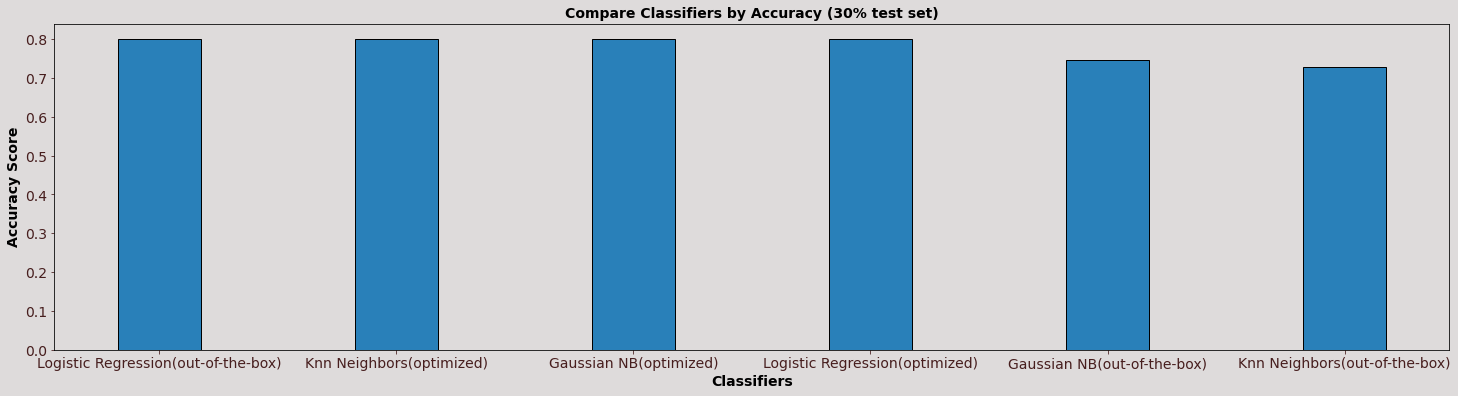

In [ ]:
accuracy_classifiers_compare_plot = []
accuracy_results_compare_plot = []
for i in range(len(dataFrame_accuracy_results_compare)):
  accuracy_classifiers_compare_plot.append(dataFrame_accuracy_results_compare[i][1])
  accuracy_results_compare_plot.append(dataFrame_accuracy_results_compare[i][6])

fig = plt.figure(figsize = (25, 6), facecolor='#dedbdb')
 
# creating the bar plot
plt.bar(accuracy_classifiers_compare_plot, accuracy_results_compare_plot, color=	"#2980b9", edgecolor ='black',
        width = 0.35)
 
plt.xlabel("Classifiers", fontweight='bold', fontsize="14", )
plt.ylabel("Accuracy Score", fontweight='bold', fontsize="14")
plt.title("Compare Classifiers by Accuracy (30% test set)", fontweight='bold',fontsize="14")
plt.tick_params(colors='#471e1e', axis='both', labelsize=14)
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'axes.facecolor':'#dedbdb'})
plt.show()

## Παρακάτω απεικονίζουμε τις αποδόσεις των ταξινομητών (βελτιστοποιημένων και μη) ως προς το F1-Score σε bar plot σύγκρισης.

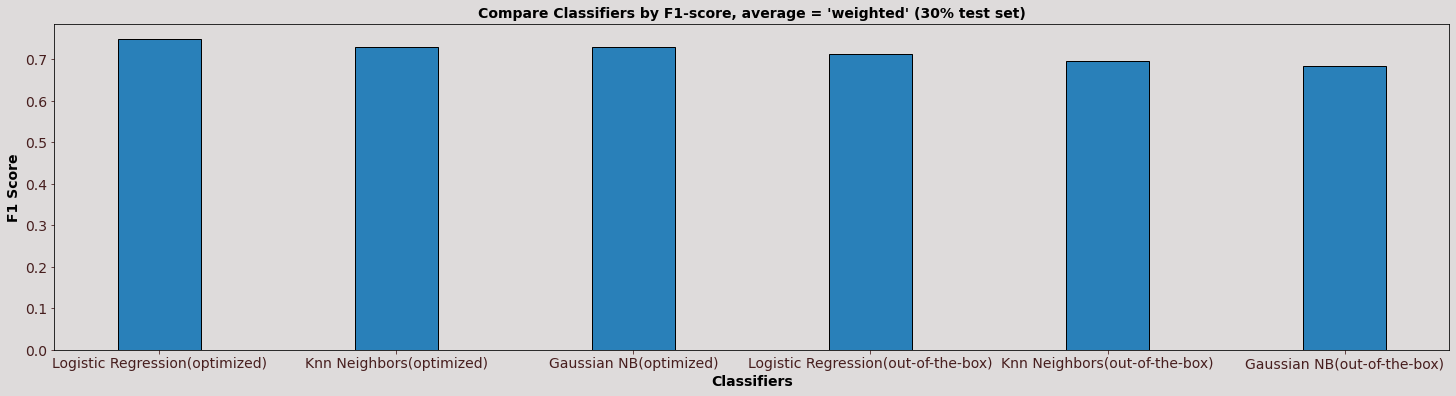

In [ ]:
f1_score_classifiers_compare_plot = []
f1_score_results_compare_plot = []
for i in range(len(dataFrame_f1_scores_compare)):
  f1_score_classifiers_compare_plot.append(dataFrame_f1_scores_compare[i][1])
  f1_score_results_compare_plot.append(dataFrame_f1_scores_compare[i][6])
  
fig = plt.figure(figsize = (25, 6), facecolor='#dedbdb')
 
# creating the bar plot
plt.bar(f1_score_classifiers_compare_plot, f1_score_results_compare_plot, color=	"#2980b9", edgecolor ='black',
        width = 0.35)
 
plt.xlabel("Classifiers", fontweight='bold', fontsize="14")
plt.ylabel("F1 Score", fontweight='bold', fontsize="14")
plt.title("Compare Classifiers by F1-score, average = 'weighted' (30% test set)", fontweight='bold',fontsize="14")
plt.tick_params(colors='#471e1e', axis='both', labelsize=14)
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'axes.facecolor':'#dedbdb'})
plt.show()

#Σχολιασμός Βελτιστοποιημένης Επίδοσης

### Εισαγωγικά μπορούμε να πούμε πως εκτελέσαμε διαφορετικούς συνδυασμούς για τη βελτιστοποίηση των ταξινομητών. Δοκιμάσαμε διαφορετικούς συνδυασμούς προεπεξεργασίας των δεδομένων και διαφορετικές τιμές στις υπερπαραμέτρους των ταξινομητών. 

### Συγκεκριμένα στον KNeighborsClassifier εξετάσαμε τις περιπτώσεις όπου n_neighbors = [1, 2, 3, 4, 5, 11]. Στον GaussianNB εξετάσαμε τις περιπτώσεις όπου var_smoothing = [1e-8, 1e-9, 1e-10, 1e-11, 1e-12]. Στον LogisticRegression εξετάσαμε τις περιπτώσεις όπου penalty = ['l1', 'l2'], solver = ['liblinear', 'lbfgs'], max_iter = [300, 100, 80, 50] και C = [1.0, 0.9, 0.8]. Οι τελικές επιλογές ύστερα από τους συνδυασμούς βρίσκονται στους πίνακες (DataFrame) accuracy και F1-Score. Τέλος επιλέχθηκαν διαφορετικές υπερπαράμετροι για βελτιστοποίηση ως προς F1-Score από ότι για Accuracy.

### Για την προεπεξεργασία των δεδομένων δοκιμάσαμε να εξετάσουμε συνδυασμούς μεταξύ των VarianceThreshold(), StandardScaler(), RandomOverSampler() ή SMOTE() και PCA(). Ωστόσο εξετάσαμε παραμέτρους μόνο στους VarianceThreshold(), SMOTE() και PCA(). Για τους υπόλοιπους, προς εξοικονόμηση χρόνου, πήραμε default τιμές παραμέτρων. Οι τελικές επιλογές ύστερα από τους συνδυασμούς βρίσκονται στους πίνακες (DataFrame) accuracy και F1-Score. Τέλος επιλέχθηκαν διαφορετικοί συνδυασμοί προεπεξεργασίας δεδομένων για βελτιστοποίηση ως προς F1-Score από ότι για Accuracy.

### Έχοντας αναφερεί όλα τα παραπάνω πρέπει να υπενθυμίσουμε πως έχουμε ένα πολύ μικρό dataset με λίγα δείγματα και λίγα χαρακτηριστικά, κάτι το οποίο καθιστά δύσκολο την εκπαίδευση ενός ταξινομητή. Αυτό φάνηκε εξαρχής όπου οι ταξινομητές χωρίς βελτιστοποίηση δε ξεπέρασαν σε επιδόσεις τον DummyClassifier και το παρατηρούμε και στα παραπάνω διαγράμματα/πίνακες που προκύπτουν μετά τη βελτιστοποίηση. Δηλαδή αν και βελτιστοποιημένοι οι ταξινομητές μας αδυνατούν να βελτιωθούν αρκετά. Έχουν καλύτερες επιδόσεις συγκριτικά με την out-of-the-box επίδοση τους, αλλά σε ένα μέτριο βαθμό. Παρατηρούμε πως λόγω του imbalanced dataset υπάρχουν περιπτώσεις όπου χρησιμοποιείται RandomOverSampler() ή SMOTE(), κάτι το οποίο είναι απόλυτα λογικό. Όσες φορές τρέξαμε από την αρχή όλο το notebook παρατηρήσαμε πως πολύ συχνά επιλέχθηκε VarianceThreshold(threshold=0) δηλαδή να καταργηθούν τα χαρακτηριστικά που έχουν την ίδια τιμή σε όλα τα δείγματα κάτι το οποίο δε συμβαίνει. Κοινώς για τις βέλτιστες λύσεις δεν είχαμε αφαίρεση χαρακτηριστικών. Κάτι τέτοιο είναι λογικό καθώς έχουμε ένα μικρό dataset με 12 χαρακτηριστικά και μια αφαίρεση χαρακτηριστικού οδηγεί σε χειρότερη εκπαίδευση του ταξινομητή. 

### Χαρακτηριστικό αποτελεί πως μετά τη βελτιστοποίηση και οι 3 ταξινομητές μας δε μπόρεσαν να περάσουν σε accuracy τη μη βελτιστοποιημένη εκπαίδευση του Logistic Regression. Και οι 3 ταξινομητές μετά από τη βελτιστοποίηση χρειάστηκαν κάποιο χρόνο για να φτάσουν το αρχικό accuracy του Logistic Regression. Μάλιστα ο ίδιος ο Logistic Regression μετά από περίπου 13 λεπτά δε πέτυχε καλύτερο accuracy.

### Tέλος ο Logistic Regression μετά τη βελτιστοποίηση πέτυχε το καλύτερο F1-Score αλλά χρειάστηκε 13 λεπτά ενώ ο GaussianNB πέτυχε το ελάχιστα χειρότερο F1-Score μετά από 40seconds!

# Πίνακες σύγχυσης

## Παρακάτω απεικονίζουμε για τον καλύτερο και τον χειρότερο ταξινομητή (εξαιρουμένων των dummy) τους πίνακες σύγχυσης με γραφικό τρόπο.

### Στο dictionary best_optimized_options_for_f1 είχαμε κρατήσει για κάθε key ένα value μέσα στο οποίο είχαμε αποθηκεύσει το αντίστοιχο confusion matrix. Aυτό το dictionary έχει μέσα όλες τις πληροφορίες των ταξινομητών που κάναμε train ως προς F1-Score. Παρακάτω ανακτούμε αυτά τα confusion matrix.

In [ ]:
sorted_best_optimized_options_for_f1 = dict(sorted(best_optimized_options_for_f1. items(), key=lambda x: x[1][3], reverse=True))
best = 1
worst = 3
i = 1
best_matrix = [[]]
worst_matrix = [[]]
for k,v in sorted_best_optimized_options_for_f1.items():
  # best case confusion matrix
  if i == 1:
    best_matrix = v[4]
  if i == 3:
    worst_matrix = v[4]
  i += 1
#print(best_matrix)
#print(worst_matrix)

## O παρακάτω confusion matrix ανήκει στον optimized Logistic Regression, ο οποίος όπως φαίνεται παραπάνω είναι ο καλύτερος ως προς F1-Score.

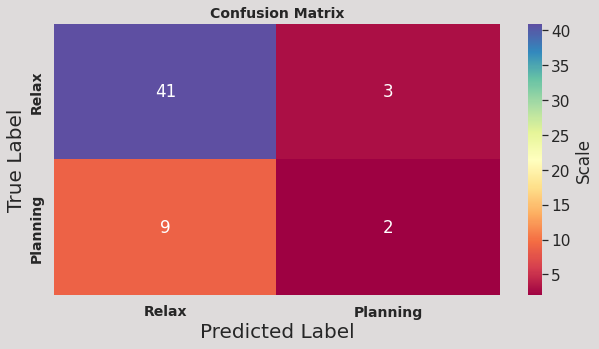

In [ ]:
import seaborn

def plot_confusion_matrix(data, labels):    
    seaborn.set(color_codes=True)
    plt.figure(figsize = (10, 5), facecolor='#dedbdb')
    plt.title("Confusion Matrix", fontweight='bold',fontsize="14")
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="Spectral", cbar_kws={'label': 'Scale'})
    ax.set_xticklabels(labels, fontweight='bold', fontsize="14")
    ax.set_yticklabels(labels, fontweight='bold', fontsize="14")
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    ax.xaxis.get_label().set_fontsize(20)
    ax.yaxis.get_label().set_fontsize(20)
 
labels = ["Relax", "Planning"]
plot_confusion_matrix(best_matrix, labels)

### Από το παραπάνω confusion matrix έχουμε πως σε 41 (True Negative) περιπτώσεις βρέθηκε αληθώς η κλάση Relax και σε μόλις 2(True Positive) περιπτώσεις βρέθηκε αληθώς η κλάση Planning. Ωστόσο σε 3 περιπτώσεις (False Positive) ο ταξινομητής μας λανθασμένα κατέταξε τα δείγματα στην κλάση Planning καθώς ανήκουν στην κλάση Relax. Tέλος λανθασμένα κατέταξε 9 περιπτώσεις (False Negative) στην κλάση Relax ενώ ανήκουν στην κλάση Planning. Γενικότερα έχουμε βελτίωση συγκριτικά με τις out-of-the-box επιδόσεις, ωστόσο θα θέλαμε μέσω της βελτιστοποιήσης να μειώναμε έστω τα False Negative, και να αυξάναμε τα σωστά prediction ως προς την κλάση Planning η οποία είναι μειονότητα στο dataset μας. To πιο πιθανό είναι πως αυτές οι 9 μετρήσεις να έμοιαζαν αρκετά με την κλάση Relax ενώ στην πραγματικότητα άνηκαν στην κλάση Planning. Στην περίπτωση αυτής της βελτιστοποίησης δεν είμαστε ικανοποιημένοι καθώς η κλάση που βρίσκεται σε μειοψηφία αδυνατεί να εντοπιστεί.

## O παρακάτω confusion matrix ανήκει στον optimized Gaussian NB, ο οποίος όπως φαίνεται παραπάνω είναι ο χειρότερος ως προς F1-Score.



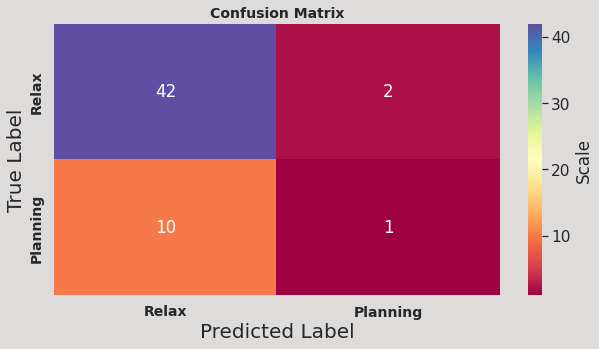

In [ ]:
plot_confusion_matrix(worst_matrix, labels)

### Το παραπάνω confusion matrix του optimized Gaussian NB βρίσκεται σε χειρότερη θέση παρόλο που έχουν γίνει βελτιστοποιήσεις. Eνώ προέβλεψε σχέδον ίδιο αριθμό Τrue Negative έχουμε ελαφριά αύξηση των False Negative και ελαφριά μείωση των False Positive.

## Γενικός Σχολιασμός

### Σε γενικές γραμμές παρατηρήσαμε μια μέτρια βελτίωση του Logistic Regression κάτι το οποίο φαίνεται στα παραπάνω διαγράμματα/πίνακες. Αυτό μας δείχνει πως στο παρών dataset ο Logistic Regression έχει τη δυνατότητα να εκπαιδευτεί καλύτερα από τους υπόλοιπους ταξινομητές αλλά σε περισσότερο χρόνο. Οι υπόλοιποι δύο ταξινομήτες πετυχαίνουν ίδιο accuracy (0.8) και ελαφρώς χειρότερο F1-Score σε πολύ λιγότερο χρόνο (0.73 o KNN, 0.73 ο Gaussian NB και 0.75 ο Logistic Regression). Σε γενικές γραμμές ο KNN βρίσκεται πολύ κοντά σε επιδόσεις με τον Logistic Regression αλλά εκτελείται σε πολύ λιγότερο χρόνο και αυτός είναι ο ταξινομητής τον οποίο θα προτείνουμε στο παρών dataset. 

### Ωστόσο οφείλουμε να παραδεχτούμε πως δεν καλύψαμε όλο το εύρος των δυνατών συνδυασμών προεπεξεργασίας δεδομένων και υπερπαραμέτρων των ταξινομητών. Θα μπορούσαμε να δοκιμάσουμε και άλλες τεχνικές προεπεξεργασίας. Βέβαια, πρόκειται για ένα πολύ μικρό dataset και δεν πρέπει να περιμένουμε δραματικές αλλαγές. Στον kNN Θα μπορούσαμε να δοκιμάσουμε επιπλέον και άλλες υπερπαραμέτρους όπως weights και metric. 

### Mετά από αναζήτηση σχετικής βιβλιογραφίας (https://ieeexplore.ieee.org/document/7100718, https://www.academia.edu/9480534/Classification_of_EEG_Signals_by_using_Support_Vector_Machines) παρατηρούμε πως η γενική βελτιστοποίηση των ταξινομητών στο παρών Dataset δε ξεπερνάει το 75%.